# Importando bibliotecas

In [1]:
# biblotecas para manipulação de dados
import pandas as pd
import numpy as np

#Biblioteca para visualização de dados
import matplotlib.pyplot as plt

#Bibliotecas auxiliares
import os
from functools import reduce
import re

#Biblioteca propria
import sys
sys.path.append("../src/")
from eda.eda import describe
from io_pyarrow.io_pyarrow import pyarrow_read_csv,write_table_from_pandas #leitura e escrita de arquivos csv grandes

%reload_ext watermark
%watermark --iversions

pandas    : 1.2.2
re        : 2.2.1
matplotlib: 3.3.3
sys       : 3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
numpy     : 1.20.1



___

# Importando arquivos

In [2]:
#Definindo path dos arquivos
path_data = "../data/raw/"

## Fiocruz
fonte: https://bigdata.icict.fiocruz.br/covid-19

### COVID SAUDE
<b>Descrição</b>: Os dados dos estados e municípios são obtidos na página oficial do Ministério da Saúde.<br>
fonte: https://covid.saude.gov.br/

In [3]:
obitos_brasil = pyarrow_read_csv(path_data+"Fiocruz/COVID_MS/HIST_PAINEL_COVIDBR_06mai2021.csv",sep = ";")
obitos_brasil_ = obitos_brasil.copy()

___

# Analisando as bases de dados

In [4]:
describe(obitos_brasil)

Quantidade de linhas: 2282184


variable     type       na  na_pct  unique       min  \
0                   regiao   object        0    0.0%       6         -   
1                   estado   object        0    0.0%      28         -   
2                municipio   object        0    0.0%    5298         -   
3                    coduf    int64        0    0.0%      28        11   
4                   codmun  float64    12238   0.54%    5591  110000.0   
5           codRegiaoSaude  float64    20764   0.91%     450   11001.0   
6          nomeRegiaoSaude   object        0    0.0%     441         -   
7                     data   object        0    0.0%     437         -   
8                semanaEpi    int64        0    0.0%      53         1   
9         populacaoTCU2019  float64     8526   0.37%    5104     781.0   
10          casosAcumulado    int64        0    0.0%   38912         0   
11              casosNovos    int64        0    0.0%    4226    -13915   
12         obitosAcumulado    int64        0    0.0%    8481         0   
13             obitosNovos    int64        0    0.0%     747      -292   
14        Recuperadosnovos  float64  2281800  99.98%     384   22130.0   
15   emAcompanhamentoNovos  float64  2281800  99.98%     384   14062.0   
16  interior/metropolitana  float64    20764   0.91%       2       0.0   

       quat25     median           mean      quat75          max  \
0           -          -              -           -            -   
1           -          -              -           -            -   
2           -          -              -           -            -   
3        25.0       31.0      32.359824        41.0           76   
4    251200.0   314610.0   325258.01413    411915.0     530010.0   
5     25010.0    31059.0   32403.123698     41015.0      53001.0   
6           -          -              -           -            -   
7           -          -              -           -            -   
8        14.0       24.0      26.021379        39.0           53   
9      5474.0    11708.0  118491.265727     25768.0  210147125.0   
10       18.0      138.0    3018.912352       526.0     15003563   
11        0.0        0.0      19.722638         3.0       100158   
12        0.0        3.0      82.353053        11.0       416949   
13        0.0        0.0       0.548092         0.0         4249   
14  1586770.0  4919297.0   5159228.8125  7970043.75   13591335.0   
15  435763.75   665558.5    657288.8125    842819.0    1317658.0   
16        0.0        0.0         0.0693         0.0          1.0   

               std skewness  kurtosis media_desvio  
0                -        -         -            -  
1                -        -         -            -  
2                -        -         -            -  
3         9.876041     0.16     -0.47         3.28  
4     98535.045904     0.12     -0.53          3.3  
5      9836.343481     0.14     -0.52         3.29  
6                -        -         -            -  
7                -        -         -            -  
8        14.968391     0.16     -1.16         1.74  
9   3050413.433226    63.85   4346.99         0.04  
10    99167.365374     99.6   11530.9         0.03  
11      612.622602    91.44   9952.08         0.03  
12     2641.877179    93.68  10587.41         0.03  
13       18.581653   114.98  17735.78         0.03  
14  3899907.567942     0.39     -0.89         1.32  
15   313331.570644     0.01     -0.39          2.1  
16        0.253963     3.39       9.5         0.27

In [5]:
obitos_brasil_.head()

regiao estado municipio  coduf  codmun  codRegiaoSaude nomeRegiaoSaude  \
0  Brasil                      76     NaN             NaN                   
1  Brasil                      76     NaN             NaN                   
2  Brasil                      76     NaN             NaN                   
3  Brasil                      76     NaN             NaN                   
4  Brasil                      76     NaN             NaN                   

         data  semanaEpi  populacaoTCU2019  casosAcumulado  casosNovos  \
0  2020-02-25          9       210147125.0               0           0   
1  2020-02-26          9       210147125.0               1           1   
2  2020-02-27          9       210147125.0               1           0   
3  2020-02-28          9       210147125.0               1           0   
4  2020-02-29          9       210147125.0               2           1   

   obitosAcumulado  obitosNovos  Recuperadosnovos  emAcompanhamentoNovos  \
0                0            0               NaN                    NaN   
1                0            0               NaN                    NaN   
2                0            0               NaN                    NaN   
3                0            0               NaN                    NaN   
4                0            0               NaN                    NaN   

   interior/metropolitana  
0                     NaN  
1                     NaN  
2                     NaN  
3                     NaN  
4                     NaN

In [6]:
#Verificando o numero de obitos no Brasil
obitos_brasil_.query("regiao == 'Brasil'").obitosAcumulado.max()

416949

In [7]:
obitos_brasil_.query("municipio != ''").groupby("codmun").obitosAcumulado.max().sum()

416963

## data

In [8]:
#Verificando quantos dias não podem ser convertidos
pd.to_datetime(obitos_brasil.data,errors='coerce').isna().sum()

0

In [9]:
#Como não há nenhum registro com problemas de conversão, vamos converter todos
obitos_brasil.data = pd.to_datetime(obitos_brasil.data,errors='coerce')

## regiao

In [10]:
#Há um elemento sumarizado, que iremos remover
obitos_brasil.regiao.value_counts()

Nordeste        735951
Sudeste         680580
Sul             486075
Centro-Oeste    192162
Norte           186977
Brasil             439
Name: regiao, dtype: int64

In [11]:
obitos_brasil = obitos_brasil.query("regiao != 'Brasil'")

obitos_brasil## estado

In [12]:
obitos_brasil.estado.value_counts(normalize=True)*100

MG    15.214715
SP    11.513688
RS     8.880265
BA     7.456793
PR     7.136512
SC     5.285998
GO     4.414122
PI     4.022667
PB     4.004873
MA     3.898113
PE     3.328724
CE     3.310931
RN     3.008443
PA     2.581402
MT     2.545815
TO     2.510228
AL     1.851872
RJ     1.673938
MS     1.424831
ES     1.424831
SE     1.371450
AM     1.122343
RO     0.962202
AC     0.410607
RR     0.303846
AP     0.303846
DF     0.036945
Name: estado, dtype: float64

## municipio

In [13]:
#Existem alguns municipios nulos. Vamos verificar
obitos_brasil.municipio.value_counts(dropna=False)

                       20325
Bom Jesus               2030
São Domingos            2030
Santa Luzia             1624
Bonito                  1624
                       ...  
Brochier                 406
Cuité de Mamanguape      406
Vera Mendes              406
Sud Mennucci             406
Mantena                  406
Name: municipio, Length: 5298, dtype: int64

In [14]:
#Trata-se do sumario dos estados na tabela. Vamos remover essa informação também
obitos_brasil.query("municipio == ''")

regiao estado municipio  coduf    codmun  codRegiaoSaude  \
439             Norte     RO               11       NaN             NaN   
440             Norte     RO               11       NaN             NaN   
441             Norte     RO               11       NaN             NaN   
442             Norte     RO               11       NaN             NaN   
443             Norte     RO               11       NaN             NaN   
...               ...    ...       ...    ...       ...             ...   
2181897  Centro-Oeste     GO               52  520000.0             NaN   
2181898  Centro-Oeste     GO               52  520000.0             NaN   
2181899  Centro-Oeste     GO               52  520000.0             NaN   
2181900  Centro-Oeste     GO               52  520000.0             NaN   
2181901  Centro-Oeste     GO               52  520000.0             NaN   

        nomeRegiaoSaude       data  semanaEpi  populacaoTCU2019  \
439                     2020-02-25          9         1777225.0   
440                     2020-02-26          9         1777225.0   
441                     2020-02-27          9         1777225.0   
442                     2020-02-28          9         1777225.0   
443                     2020-02-29          9         1777225.0   
...                 ...        ...        ...               ...   
2181897                 2021-05-02         18               NaN   
2181898                 2021-05-03         18               NaN   
2181899                 2021-05-04         18               NaN   
2181900                 2021-05-05         18               NaN   
2181901                 2021-05-06         18               NaN   

         casosAcumulado  casosNovos  obitosAcumulado  obitosNovos  \
439                   0           0                0            0   
440                   0           0                0            0   
441                   0           0                0            0   
442                   0           0                0            0   
443                   0           0                0            0   
...                 ...         ...              ...          ...   
2181897               0           0                0            0   
2181898               0           0                0            0   
2181899               0           0                0            0   
2181900               0           0                0            0   
2181901               0           0                0            0   

         Recuperadosnovos  emAcompanhamentoNovos  interior/metropolitana  
439                   NaN                    NaN                     NaN  
440                   NaN                    NaN                     NaN  
441                   NaN                    NaN                     NaN  
442                   NaN                    NaN                     NaN  
443                   NaN                    NaN                     NaN  
...                   ...                    ...                     ...  
2181897               NaN                    NaN                     NaN  
2181898               NaN                    NaN                     NaN  
2181899               NaN                    NaN                     NaN  
2181900               NaN                    NaN                     NaN  
2181901               NaN                    NaN                     NaN  

[20325 rows x 17 columns]

In [15]:
obitos_brasil.query("municipio == ''").estado.value_counts()

MA    843
SE    843
SC    843
AL    843
RN    843
PB    843
ES    843
RS    843
MG    843
PE    843
SP    843
TO    843
RR    843
GO    843
PI    843
CE    843
MT    843
BA    843
RJ    843
RO    843
PR    843
AP    437
DF    437
MS    437
PA    437
AC    437
AM    437
Name: estado, dtype: int64

In [16]:
obitos_brasil = obitos_brasil.query("municipio != ''").sort_values(["codmun","data"]).reset_index(drop=True)

## nomeRegiaoSaude

In [17]:
obitos_brasil.nomeRegiaoSaude.value_counts(dropna=False)

CENTRAL                                23548
SUL                                    17864
VALE DO RIO GUARIBAS                   17052
6ª REGIAO DE SAUDE - PAU DOS FERROS    15022
NORTE                                  14210
                                       ...  
JOAO PINHEIRO                           1218
SANTOS DUMONT                           1218
CORUMBA                                  812
SAO PAULO                                406
DISTRITO FEDERAL                         406
Name: nomeRegiaoSaude, Length: 440, dtype: int64

## semanaEpi

In [18]:
#É o campo que representa a semana acumulada desde o inicio do monitoramento
obitos_brasil.semanaEpi.value_counts(dropna=False).sort_index()

1     38990
2     38990
3     38990
4     38990
5     38990
6     38990
7     38990
8     38990
9     38990
10    38990
11    38990
12    38990
13    50130
14    77980
15    77980
16    77980
17    77980
18    66840
19    38990
20    38990
21    38990
22    38990
23    38990
24    38990
25    38990
26    38990
27    38990
28    38990
29    38990
30    38990
31    38990
32    38990
33    38990
34    38990
35    38990
36    38990
37    38990
38    38990
39    38990
40    38990
41    38990
42    38990
43    38990
44    38990
45    38990
46    38990
47    38990
48    38990
49    38990
50    38990
51    38990
52    38990
53    38990
Name: semanaEpi, dtype: int64

In [19]:
obitos_brasil.groupby('semanaEpi').data.max()

semanaEpi
1    2021-01-09
2    2021-01-16
3    2021-01-23
4    2021-01-30
5    2021-02-06
6    2021-02-13
7    2021-02-20
8    2021-02-27
9    2021-03-06
10   2021-03-13
11   2021-03-20
12   2021-03-27
13   2021-04-03
14   2021-04-10
15   2021-04-17
16   2021-04-24
17   2021-05-01
18   2021-05-06
19   2020-05-09
20   2020-05-16
21   2020-05-23
22   2020-05-30
23   2020-06-06
24   2020-06-13
25   2020-06-20
26   2020-06-27
27   2020-07-04
28   2020-07-11
29   2020-07-18
30   2020-07-25
31   2020-08-01
32   2020-08-08
33   2020-08-15
34   2020-08-22
35   2020-08-29
36   2020-09-05
37   2020-09-12
38   2020-09-19
39   2020-09-26
40   2020-10-03
41   2020-10-10
42   2020-10-17
43   2020-10-24
44   2020-10-31
45   2020-11-07
46   2020-11-14
47   2020-11-21
48   2020-11-28
49   2020-12-05
50   2020-12-12
51   2020-12-19
52   2020-12-26
53   2021-01-02
Name: data, dtype: datetime64[ns]

## populacaoTCU2019

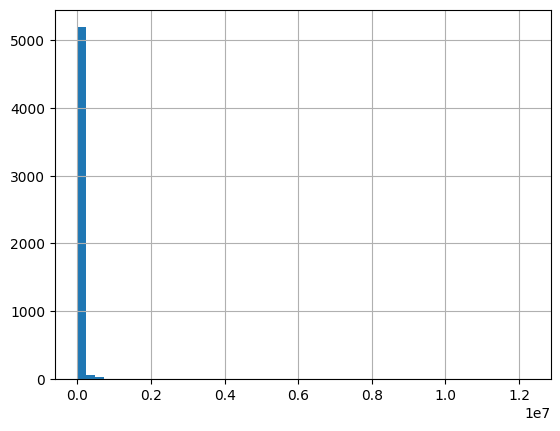

In [20]:
#Vendo a distribuicao da população
obitos_brasil.groupby('municipio').populacaoTCU2019.last().hist(bins=50)
plt.show()

In [21]:
#Verificando se ainda nao temos valores na
obitos_brasil[obitos_brasil.populacaoTCU2019.isna()]

Empty DataFrame
Columns: [regiao, estado, municipio, coduf, codmun, codRegiaoSaude, nomeRegiaoSaude, data, semanaEpi, populacaoTCU2019, casosAcumulado, casosNovos, obitosAcumulado, obitosNovos, Recuperadosnovos, emAcompanhamentoNovos, interior/metropolitana]
Index: []

In [22]:
obitos_brasil.populacaoTCU2019.describe()

count    2.261420e+06
mean     3.772839e+04
std      2.214382e+05
min      7.810000e+02
25%      5.446000e+03
50%      1.163100e+04
75%      2.549200e+04
max      1.225202e+07
Name: populacaoTCU2019, dtype: float64

## casosAcumulado

In [23]:
obitos_brasil.casosAcumulado.describe()

count    2.261420e+06
mean     1.009523e+03
std      7.392792e+03
min      0.000000e+00
25%      1.800000e+01
50%      1.370000e+02
75%      5.170000e+02
max      7.305460e+05
Name: casosAcumulado, dtype: float64

## casosNovos

In [24]:
#O valor mínimo de casos novos deu negativo. Tem algo errado aqui
obitos_brasil.casosNovos.describe()

count    2.261420e+06
mean     6.619020e+00
std      5.852063e+01
min     -3.684000e+03
25%      0.000000e+00
50%      0.000000e+00
75%      2.000000e+00
max      4.017000e+04
Name: casosNovos, dtype: float64

In [25]:
#Vamos verificar uma cidade para estudar esse evento
obitos_brasil.groupby('casosNovos')[["codmun","municipio"]].first()

codmun              municipio
casosNovos                                 
-3684       313960.0                Mantena
-2977       310740.0           Bom Despacho
-2466       230440.0              Fortaleza
-2407       230440.0              Fortaleza
-2203       241230.0  São José do Campestre
...              ...                    ...
 7592       330455.0         Rio de Janeiro
 8348       355030.0              São Paulo
 8646       355030.0              São Paulo
 14338      410690.0               Curitiba
 40170      410690.0               Curitiba

[1799 rows x 2 columns]

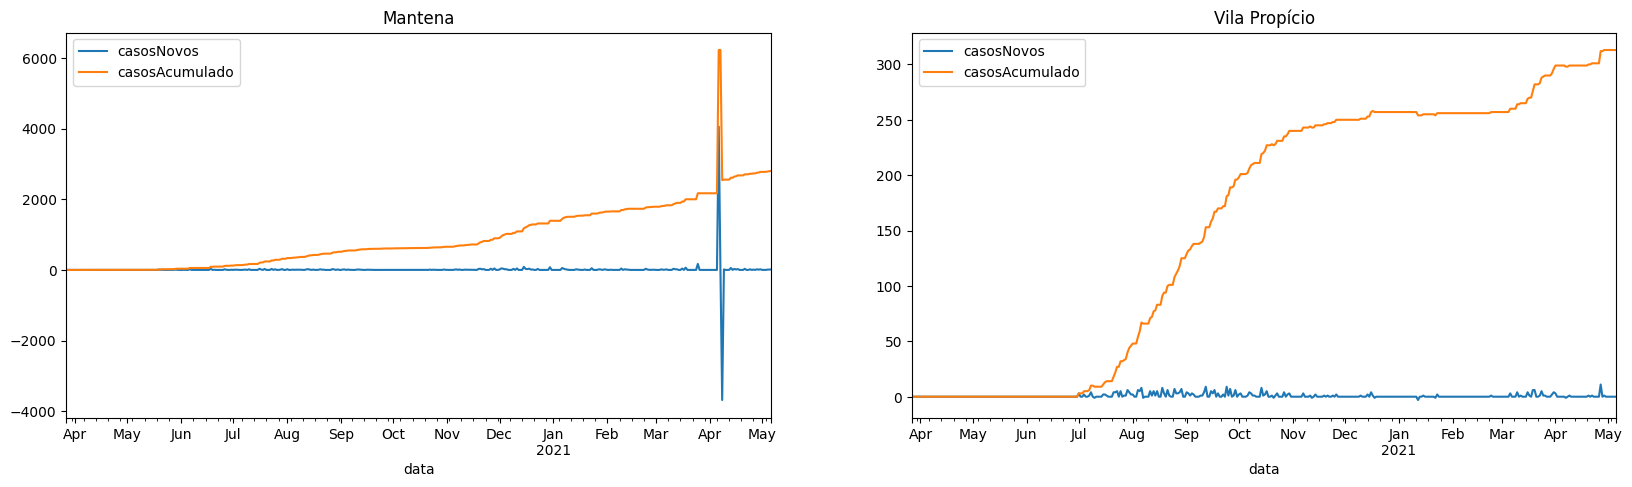

In [26]:
#Vamos ver se na linha do tempo houve uma redução nos casos acumulados (recontagem). É provavel que tenha ocorrido erro de digitação ou até mesmo recontagem
_,ax = plt.subplots(ncols=2,nrows=1,figsize=(20,5))
obitos_brasil.query("municipio == 'Mantena'").sort_values('data').plot(kind='line',x='data',y='casosNovos',ax=ax[0])
obitos_brasil.query("municipio == 'Mantena'").sort_values('data').plot(kind='line',x='data',y='casosAcumulado',ax=ax[0])
ax[0].set_title("Mantena")

obitos_brasil.query("municipio == 'Vila Propício'").sort_values('data').plot(kind='line',x='data',y='casosNovos',ax=ax[1])
obitos_brasil.query("municipio == 'Vila Propício'").sort_values('data').plot(kind='line',x='data',y='casosAcumulado',ax=ax[1])
ax[1].set_title("Vila Propício")
plt.show()

In [27]:
#Checando a proporção de casos novos negativos
obitos_brasil.assign(casoNovo_negativo = lambda x: x["casosNovos"] < 0).pivot_table(index = "estado", 
                                                                                    values = 'data', 
                                                                                    columns = 'casoNovo_negativo',
                                                                                    aggfunc = 'count',
                                                                                    fill_value=0).reset_index().assign(Perc = lambda x: 100*x[False]/(x[False]+x[True]))


casoNovo_negativo estado   False  True        Perc
0                     AC    8714   218   97.559337
1                     AL   41041   371   99.104124
2                     AM   25142    30   99.880820
3                     AP    6493     3   99.953818
4                     BA  168222  1080   99.362087
5                     CE   71510  3194   95.724459
6                     DF     406     0  100.000000
7                     ES   31407   261   99.175824
8                     GO   97117  2759   97.237575
9                     MA   87611   491   99.442691
10                    MG  344937  1381   99.601234
11                    MS   31429   645   97.989025
12                    MT   56618   628   98.902980
13                    PA   58242   222   99.620279
14                    PB   89647   891   99.015883
15                    PE   74179   931   98.760485
16                    PI   90531   413   99.545874
17                    PR  161559   435   99.731472
18                    RJ   36798   554   98.516813
19                    RN   65935  1867   97.246394
20                    RO   20719   393   98.138499
21                    RR    6063    27   99.556650
22                    RS  199162  2620   98.701569
23                    SC  117779  1991   98.337647
24                    SE   30088   362   98.811166
25                    SP  259402  2468   99.057548
26                    TO   55735   699   98.761385

In [28]:
# E no total
obitos_brasil.assign(casoNovo_negativo = lambda x: x["casosNovos"] < 0).casoNovo_negativo.value_counts(normalize=True)*100

False    98.897418
True      1.102582
Name: casoNovo_negativo, dtype: float64

In [29]:
#Vamos verificar se os valores acumulados, subtraidos dia a dia, geram os mesmos dados diarios
obitos_brasil['casosNovos_doAcumulado'] = obitos_brasil.groupby("codmun").casosAcumulado.transform(lambda x: x-x.shift())
casos = obitos_brasil[['casosNovos_doAcumulado','codmun','estado','municipio','casosNovos']].assign(igual = lambda x: x['casosNovos_doAcumulado'] == x['casosNovos'])

In [30]:
#Vejamos se temos o campo igual == True sempre, desconsiderando a primeira aparição da cidade no dataset
casos.head()

casosNovos_doAcumulado    codmun estado              municipio  casosNovos  \
0                     NaN  110001.0     RO  Alta Floresta D'Oeste           0   
1                     0.0  110001.0     RO  Alta Floresta D'Oeste           0   
2                     0.0  110001.0     RO  Alta Floresta D'Oeste           0   
3                     0.0  110001.0     RO  Alta Floresta D'Oeste           0   
4                     0.0  110001.0     RO  Alta Floresta D'Oeste           0   

   igual  
0  False  
1   True  
2   True  
3   True  
4   True

In [31]:
#Portanto, a coluna de casosNovos é proveniente da coluna acumulada, ou vice-versa
casos.query("casosNovos_doAcumulado==casosNovos_doAcumulado").igual.value_counts(normalize=True)*100

True    100.0
Name: igual, dtype: float64

In [32]:
obitos_brasil = obitos_brasil.drop(columns = ['casosNovos_doAcumulado'])

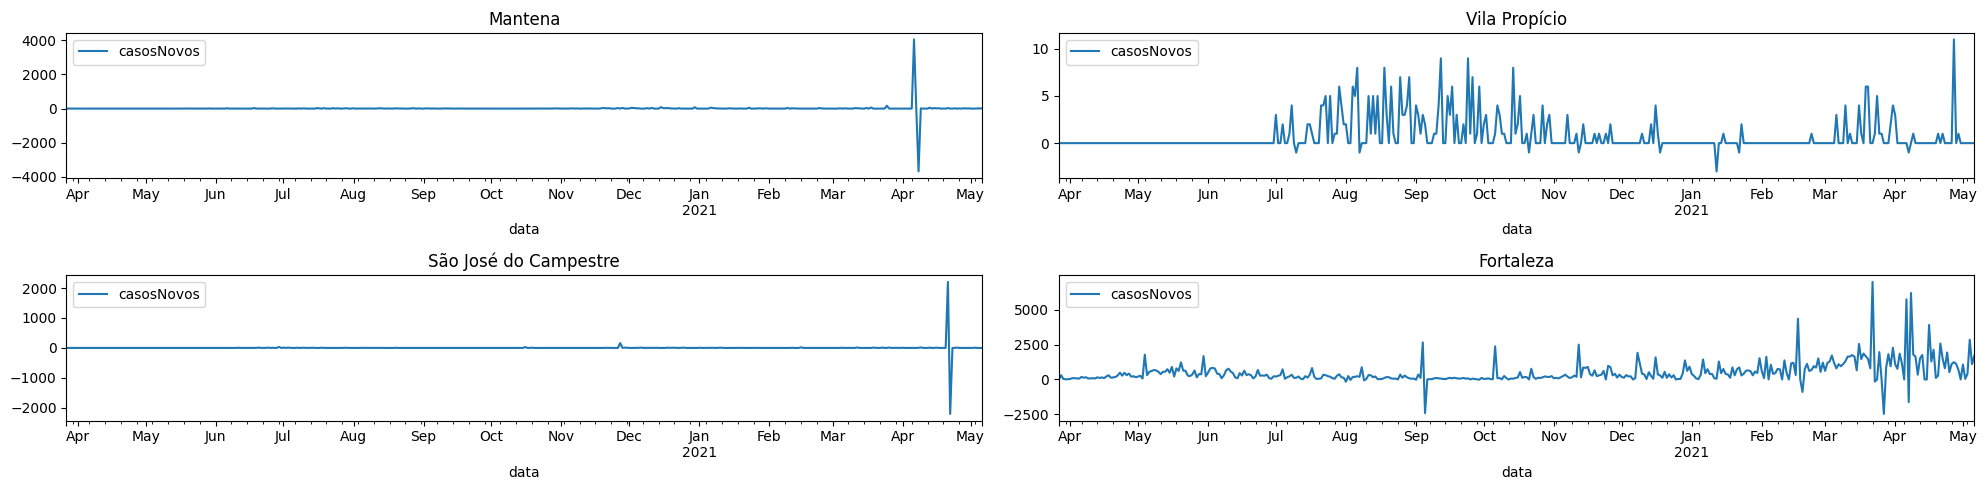

In [33]:
#Vamos verificar se é possível remover, pelo menos, os grandes "soluços" dos dados
fig,ax = plt.subplots(ncols=2,nrows=2,figsize=(20,5))

obitos_brasil.query("municipio == 'Mantena'").sort_values('data').plot(kind='line',x='data',y='casosNovos',ax=ax[0,0])
ax[0,0].set_title("Mantena")

obitos_brasil.query("municipio == 'Vila Propício'").sort_values('data').plot(kind='line',x='data',y='casosNovos',ax=ax[0,1])
ax[0,1].set_title("Vila Propício")

obitos_brasil.query("codmun == 241230").sort_values('data').plot(kind='line',x='data',y='casosNovos',ax=ax[1,0])
ax[1,0].set_title("São José do Campestre")

obitos_brasil.query("codmun == 230440.0").sort_values('data').plot(kind='line',x='data',y='casosNovos',ax=ax[1,1])
ax[1,1].set_title("Fortaleza")

fig.tight_layout()
plt.show()

In [34]:
q25 = obitos_brasil.groupby('codmun').casosNovos.transform(lambda x: x.quantile(0.25))
q75 = obitos_brasil.groupby('codmun').casosNovos.transform(lambda x: x.quantile(0.75))
upperbound = q75 + 1.5*(q75-q25)
lowerbound = q25 - 1.5*(q75-q25)

In [35]:
obitos_brasil["upperbound"]=q75
obitos_brasil["lowerbound"]=q25

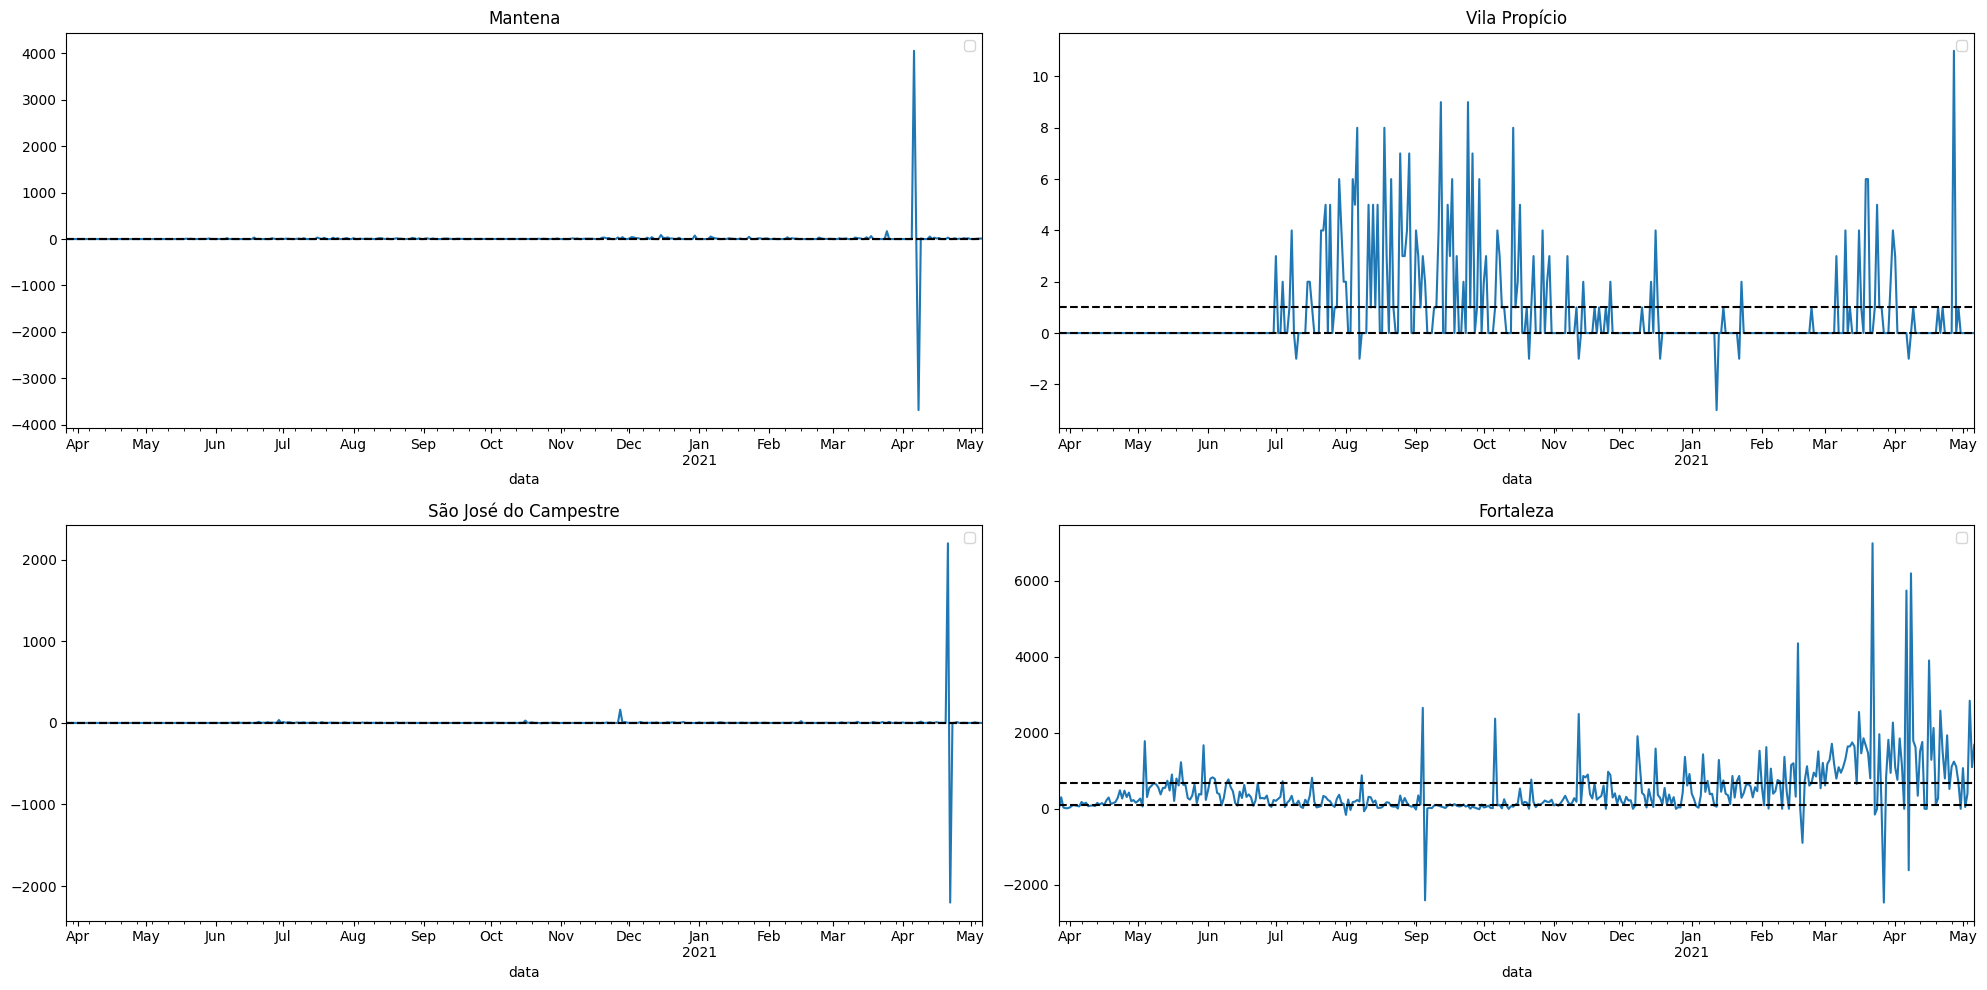

In [36]:
fig,ax = plt.subplots(ncols=2,nrows=2,figsize=(20,10))
ax = ax.flatten()

lista_cidade_plot = ["Mantena",'Vila Propício',"São José do Campestre","Fortaleza"]
lista_codmun_plot = [313960,522230,241230,230440]

for i,(mun,codmun) in enumerate(zip(lista_cidade_plot,lista_codmun_plot)):
    obitos_brasil.query("codmun == " +str(codmun)).sort_values('data').plot(kind='line',x='data',y='casosNovos',ax=ax[i])
    ax[i].plot(obitos_brasil.query("codmun == " +str(codmun)).sort_values('data').data,
                 obitos_brasil.query("codmun == " +str(codmun)).sort_values('data').lowerbound,
                 linestyle = '--',
                 color= 'black')

    ax[i].plot(obitos_brasil.query("codmun == " +str(codmun)).sort_values('data').data,
                 obitos_brasil.query("codmun == " +str(codmun)).sort_values('data').upperbound,
                 linestyle = '--',
                 color= 'black')
    ax[i].set_title(mun)
    ax[i].legend("")


fig.tight_layout()
plt.show()

Ao remover os outliers por esse método, podemos remover dados que podem estar corretos, ao observar, principalmente, os exemplos de Fortaleza e Vila Propício. Dessa forma, vamos manter os dados negativos, pois eles ajudam a ajustar os dados positivos excessivos

## obitosAcumulado

In [37]:
obitos_brasil.obitosAcumulado.describe()

count    2.261420e+06
mean     2.759910e+01
std      3.003830e+02
min      0.000000e+00
25%      0.000000e+00
50%      3.000000e+00
75%      1.000000e+01
max      2.798800e+04
Name: obitosAcumulado, dtype: float64

## obitosNovos

In [38]:
obitos_brasil.obitosNovos.describe()

count    2.261420e+06
mean     1.840335e-01
std      2.157274e+00
min     -2.380000e+02
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.780000e+02
Name: obitosNovos, dtype: float64

In [39]:
#Vamos verificar se os valores acumulados, subtraidos dia a dia, geram os mesmos dados diarios
obitos_brasil['obitosNovos_doAcumulado'] = obitos_brasil.groupby("codmun").obitosAcumulado.transform(lambda x: x-x.shift())
mortes = obitos_brasil[['obitosNovos_doAcumulado','codmun','estado','municipio','obitosNovos']].assign(igual = lambda x: x['obitosNovos_doAcumulado'] == x['obitosNovos'])

In [40]:
#Portanto, a coluna de casosNovos é proveniente da coluna acumulada, ou vice-versa
mortes.query("obitosNovos_doAcumulado==obitosNovos_doAcumulado").igual.value_counts(normalize=True)*100

True    100.0
Name: igual, dtype: float64

In [41]:
obitos_brasil = obitos_brasil.drop(columns = ['obitosNovos_doAcumulado'])

In [42]:
#Checando a proporção de casos novos negativos
obitos_brasil.assign(obitoNovo_negativo = lambda x: x["obitosNovos"] < 0).pivot_table(index = "estado", 
                                                                                    values = 'data', 
                                                                                    columns = 'obitoNovo_negativo',
                                                                                    aggfunc = 'count',
                                                                                    fill_value=0).reset_index().assign(Perc = lambda x: 100*x[False]/(x[False]+x[True]))


obitoNovo_negativo estado   False  True        Perc
0                      AC    8922    10   99.888043
1                      AL   41398    14   99.966193
2                      AM   25136    36   99.856984
3                      AP    6495     1   99.984606
4                      BA  169101   201   99.881277
5                      CE   74130   574   99.231634
6                      DF     406     0  100.000000
7                      ES   31486   182   99.425287
8                      GO   99621   255   99.744683
9                      MA   88056    46   99.947788
10                     MG  345429   889   99.743300
11                     MS   32048    26   99.918937
12                     MT   56994   252   99.559795
13                     PA   58323   141   99.758826
14                     PB   90479    59   99.934834
15                     PE   74922   188   99.749700
16                     PI   90908    36   99.960415
17                     PR  161805   189   99.883329
18                     RJ   37183   169   99.547548
19                     RN   67603   199   99.706498
20                     RO   21025    87   99.587912
21                     RR    6072    18   99.704433
22                     RS  201697    85   99.957875
23                     SC  119515   255   99.787092
24                     SE   30400    50   99.835796
25                     SP  261243   627   99.760568
26                     TO   56344    90   99.840522

In [43]:
#E verificando o total
obitos_brasil.assign(obitoNovo_negativo = lambda x: x["obitosNovos"] < 0).obitoNovo_negativo.value_counts(normalize=True)*100

False    99.793095
True      0.206905
Name: obitoNovo_negativo, dtype: float64

In [44]:
#Vamos verificar uma cidade para estudar esse evento, que deve ser por conta do mesmo efeito dos casos novos
obitos_brasil.groupby('obitosNovos')[["codmun","municipio"]].first().head(15)

codmun          municipio
obitosNovos                             
-238         510343.0        Curvelândia
-221         510340.0             Cuiabá
-111         330330.0            Niterói
-65          510770.0      Rosário Oeste
-64          510760.0       Rondonópolis
-58          330590.0  Trajano de Moraes
-53          210570.0      Lago da Pedra
-47          330600.0          Três Rios
-45          230440.0          Fortaleza
-41          230015.0            Acarape
-38          330590.0  Trajano de Moraes
-36          291350.0              Iguaí
-35          172120.0     Tocantinópolis
-32          150140.0              Belém
-29          230020.0             Acaraú

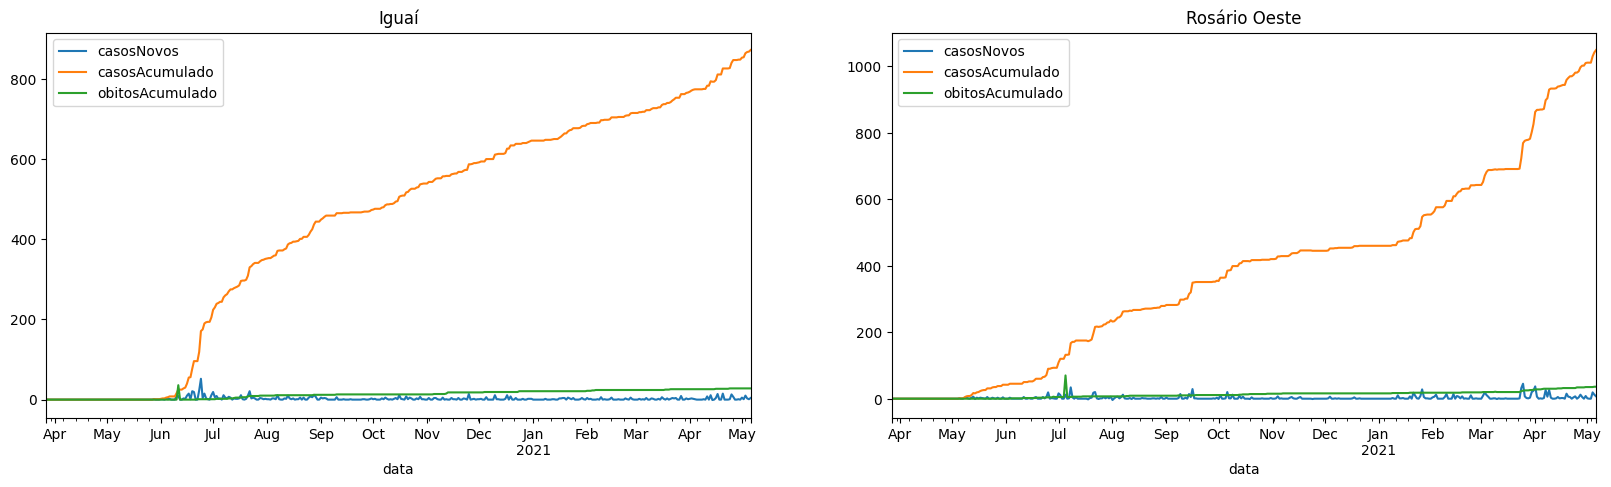

In [45]:
#Vamos ver se na linha do tempo houve uma redução nos casos acumulados (recontagem). É provavel que tenha ocorrido erro de digitação ou até mesmo recontagem
_,ax = plt.subplots(ncols=2,nrows=1,figsize=(20,5))

cidade1 = 291350.0
obitos_brasil.query("codmun == " + str(cidade1)).sort_values('data').plot(kind='line',x='data',y='casosNovos',ax=ax[0])
obitos_brasil.query("codmun == " + str(cidade1)).sort_values('data').plot(kind='line',x='data',y='casosAcumulado',ax=ax[0])
obitos_brasil.query("codmun == " + str(cidade1)).sort_values('data').plot(kind='line',x='data',y='obitosAcumulado',ax=ax[0])

ax[0].set_title(obitos_brasil[obitos_brasil["codmun"] == cidade1].municipio.iloc[0])

cidade2 = 510770.0 
obitos_brasil.query("codmun == " + str(cidade2)).sort_values('data').plot(kind='line',x='data',y='casosNovos',ax=ax[1])
obitos_brasil.query("codmun == " + str(cidade2)).sort_values('data').plot(kind='line',x='data',y='casosAcumulado',ax=ax[1])
obitos_brasil.query("codmun == " + str(cidade2)).sort_values('data').plot(kind='line',x='data',y='obitosAcumulado',ax=ax[1])

ax[1].set_title(obitos_brasil[obitos_brasil["codmun"] == cidade2].municipio.iloc[0])
plt.show()

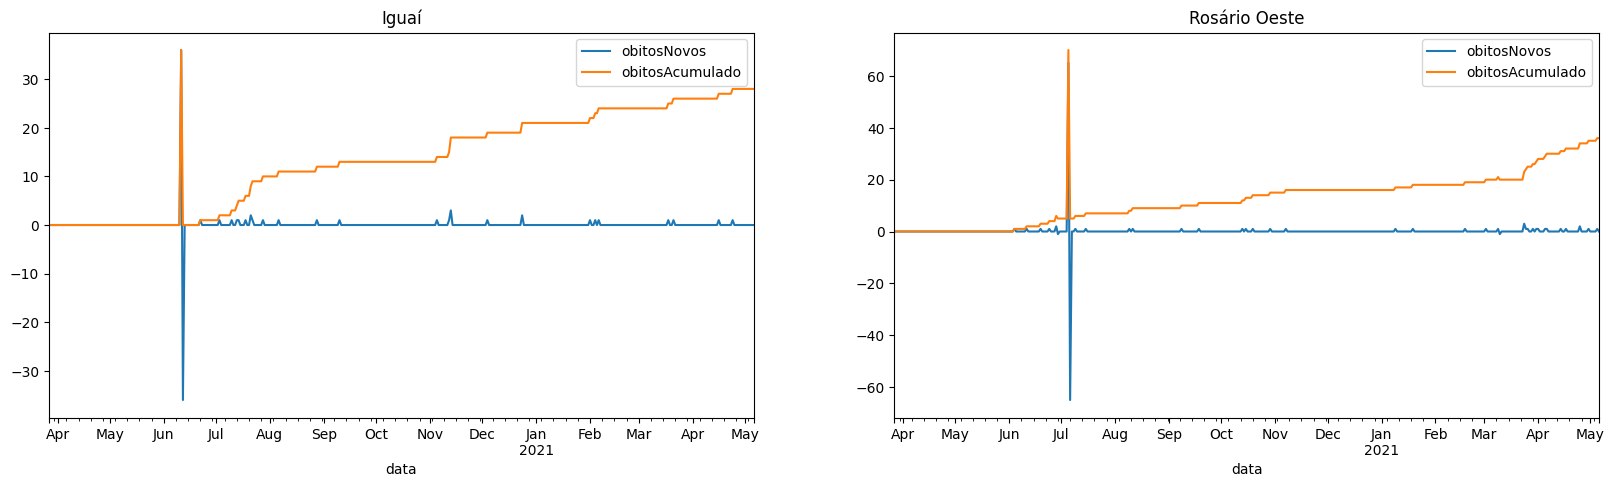

In [46]:
_,ax = plt.subplots(ncols=2,nrows=1,figsize=(20,5))

obitos_brasil.query("codmun == " + str(cidade1)).sort_values('data').plot(kind='line',x='data',y='obitosNovos',ax=ax[0])
obitos_brasil.query("codmun == " + str(cidade1)).sort_values('data').plot(kind='line',x='data',y='obitosAcumulado',ax=ax[0])

ax[0].set_title(obitos_brasil[obitos_brasil["codmun"] == cidade1].municipio.iloc[0])

obitos_brasil.query("codmun == " + str(cidade2)).sort_values('data').plot(kind='line',x='data',y='obitosNovos',ax=ax[1])
obitos_brasil.query("codmun == " + str(cidade2)).sort_values('data').plot(kind='line',x='data',y='obitosAcumulado',ax=ax[1])

ax[1].set_title(obitos_brasil[obitos_brasil["codmun"] == cidade2].municipio.iloc[0])
plt.show()

Podemos ter o mesmo problema que teriamos ao remover esses valores negativos, que estão ai por conta de recontagem. Então, vamos mantê-los

## Recuperadosnovos e emAcompanhamentoNovos

In [47]:
# Não existe essa informaçao na base de dados, portanto, iremos removê-las
obitos_brasil=obitos_brasil.drop(columns = ['Recuperadosnovos','emAcompanhamentoNovos','upperbound','lowerbound'])

## interior/metropolitana

In [48]:
#Vamos alterar o nome dessa coluna
obitos_brasil = obitos_brasil.rename(columns={"interior/metropolitana":"interior_metropolitana"})

In [49]:
#Para os casos 0 temos interior e para os casos 1 temos metropolitana
obitos_brasil.groupby(["municipio","estado"]).interior_metropolitana.first().reset_index().query("municipio == 'Campinas' | municipio == 'São Paulo' | municipio == 'Andradas'")

municipio estado  interior_metropolitana
193    Andradas     MG                     0.0
908    Campinas     SP                     1.0
4989  São Paulo     SP                     1.0

In [50]:
#Vamos fazer essa substituição, para facilitar o entendimento
obitos_brasil.interior_metropolitana=pd.Categorical(obitos_brasil.interior_metropolitana.replace({0:"interior",1:"metropolitana"}),categories=["interior","metropolitana"])

# Salvando nova base de dados

In [51]:
describe(obitos_brasil)

Quantidade de linhas: 2261420


variable            type  na na_pct  unique  \
0                   regiao          object   0   0.0%       5   
1                   estado          object   0   0.0%      27   
2                municipio          object   0   0.0%    5297   
3                    coduf           int64   0   0.0%      27   
4                   codmun         float64   0   0.0%    5570   
5           codRegiaoSaude         float64   0   0.0%     450   
6          nomeRegiaoSaude          object   0   0.0%     440   
7                     data  datetime64[ns]   0   0.0%     406   
8                semanaEpi           int64   0   0.0%      53   
9         populacaoTCU2019         float64   0   0.0%    5077   
10          casosAcumulado           int64   0   0.0%   30480   
11              casosNovos           int64   0   0.0%    1799   
12         obitosAcumulado           int64   0   0.0%    4295   
13             obitosNovos           int64   0   0.0%     237   
14  interior_metropolitana        category   0   0.0%       2   

                    min               quat25               median  \
0                     -                    -                    -   
1                     -                    -                    -   
2                     -                    -                    -   
3                    11                 25.0                 31.0   
4              110001.0             251210.0             314627.5   
5               11001.0              25010.0              31059.0   
6                     -                    -                    -   
7   2020-03-27 00:00:00  2020-07-06 00:00:00  2020-10-15 12:00:00   
8                     1                 14.0                 24.5   
9                 781.0               5446.0              11631.0   
10                    0                 18.0                137.0   
11                -3684                  0.0                  0.0   
12                    0                  0.0                  3.0   
13                 -238                  0.0                  0.0   
14                    -                    -                    -   

                             mean               quat75                  max  \
0                               -                    -                    -   
1                               -                    -                    -   
2                               -                    -                    -   
3                       32.377738                 41.0                   53   
4                   325358.627828             411920.0             530010.0   
5                    32403.123698              41015.0              53001.0   
6                               -                    -                    -   
7   2020-10-15 11:59:59.999998976  2021-01-25 00:00:00  2021-05-06 00:00:00   
8                       26.027094                 39.0                   53   
9                    37728.388689              25492.0           12252023.0   
10                    1009.523347                517.0               730546   
11                        6.61902                  2.0                40170   
12                      27.599096                 10.0                27988   
13                       0.184033                  0.0                  378   
14                              -                    -                    -   

                            std skewness   kurtosis media_desvio  
0                             -        -          -            -  
1                             -        -          -            -  
2                             -        -          -            -  
3                      9.832981     0.15      -0.52         3.29  
4                   98482.21405     0.12      -0.53          3.3  
5                   9836.343481     0.14      -0.52         3.29  
6                             -        -          -            -  
7   117 days 04:50:33.364062754        -          -            -  
8   

In [52]:
#Apenas verificando se o numero de obitos ainda bate com o do inicio da analise
print("Obitos inicio analise inicial:",obitos_brasil_.query("municipio != ''").groupby("codmun").obitosNovos.sum().sum())
print("Obitos fim analise inicial:",obitos_brasil.groupby("codmun").obitosNovos.sum().sum())

Obitos inicio analise inicial: 416177
Obitos fim analise inicial: 416177


In [53]:
write_table_from_pandas(obitos_brasil,"../data/interim/obitos_FIOCRUZ.parquet")